#### Steps
* Exploratory Data Analysis
* Cleaning and preprocessing
* Scaling
* Model Training and Evaluation

In [1]:
# import libraries

# For loading Packages
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', 100)

# For mathematical calculations
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# To build and evaluate model
import scipy.stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# To ignore any warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# store train and test dataset in a dataframe
train_df = pd.read_csv("train_burn_out_rate.csv")
test_df = pd.read_csv("test_burn_out_rate.csv")

In [3]:
# View the train dataset 
train_df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [4]:
# View the test dataset 
test_df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4
...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,2008-10-02,Female,Service,Yes,1.0,2.0,6.1
12246,fffe32003600330034003000,2008-03-31,Female,Product,Yes,2.0,4.0,5.9
12247,fffe31003800340039003000,2008-02-12,Male,Service,No,4.0,7.0,9.6
12248,fffe32003600380031003800,2008-02-06,Male,Service,No,3.0,6.0,6.7


In [5]:
# Print the shape of train and test dataset
print(train_df.shape, test_df.shape)

(22750, 9) (12250, 8)


#### Exploratory Data Analysis

In [6]:
# print information about the train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


##### Univariate Analysis

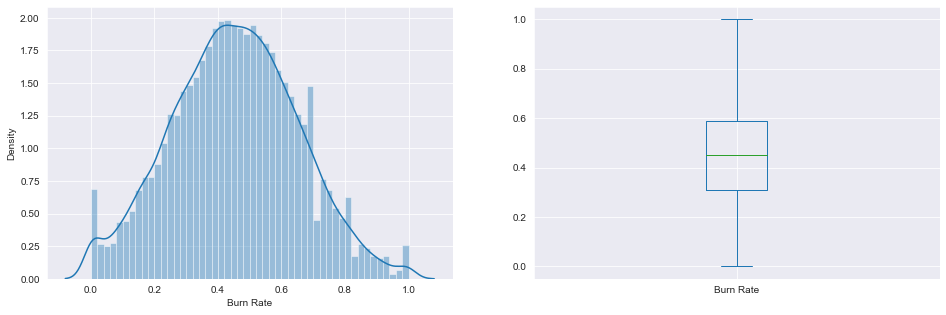

In [7]:
# Visualize target variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['Burn Rate']);
plt.subplot(122)
train_df['Burn Rate'].plot.box(figsize = (16, 5));
plt.show()

It can be seen that the distribution of the values of the target feature in the train dataset is normally distributed and outliers are not present

<AxesSubplot:title={'center':'WFH Setup Available'}>

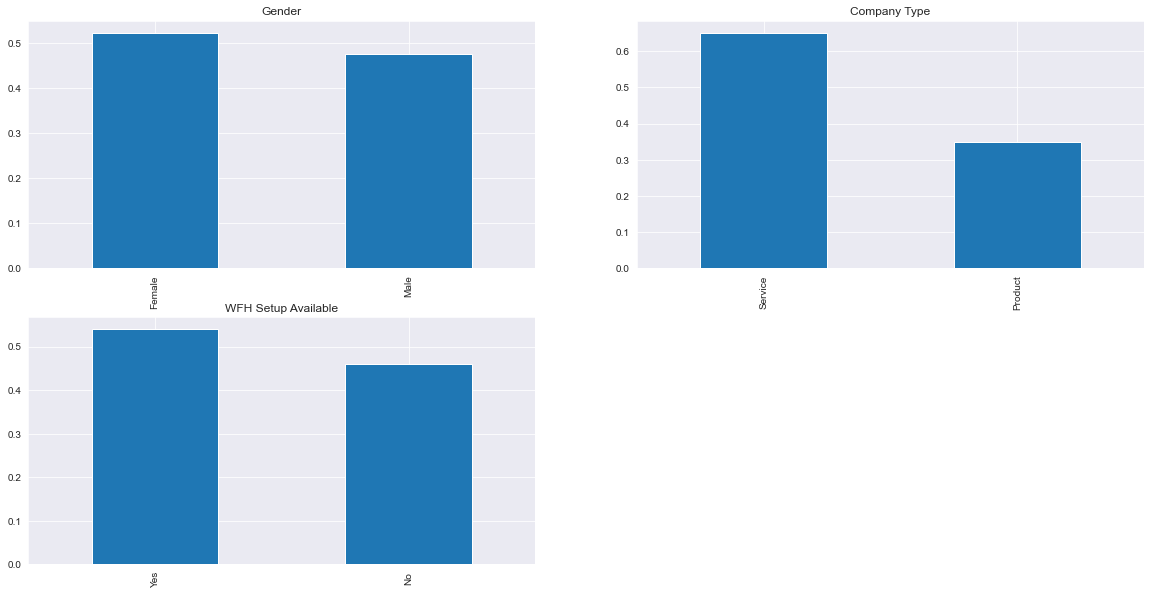

In [8]:
# Visualize independent categorical features in the train dataset
plt.figure(1) 
plt.subplot(221)
train_df['Gender'].value_counts(normalize = True).plot.bar(figsize = (20, 10), title = 'Gender')
plt.subplot(222)
train_df['Company Type'].value_counts(normalize = True).plot.bar(title = 'Company Type')
plt.subplot(223)
train_df['WFH Setup Available'].value_counts(normalize = True).plot.bar(title = 'WFH Setup Available')

It can be inferred from the barplots above that:
* there are more females than males in the train dataset
* the no of employees in the train dataset that have the WorkFromHome setup available to them are more than those that don't
* the no of employees working in a company that provides services is more than the no of those working in a company that makes products in the train dataset

<AxesSubplot:title={'center':'Resource Allocation'}>

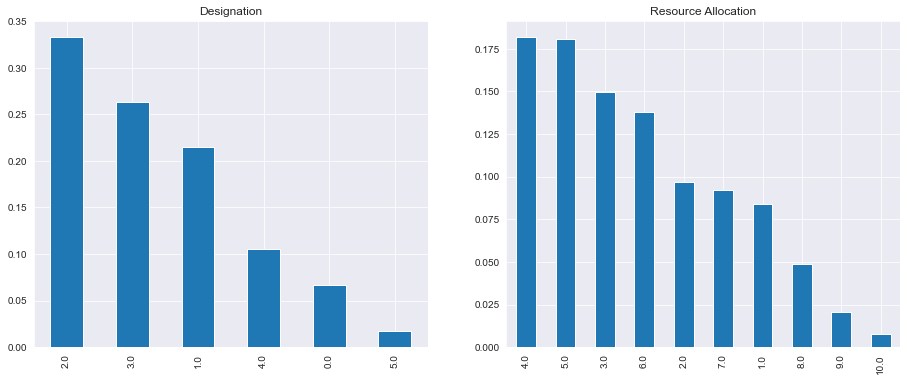

In [9]:
# Visualize independent ordinal features
plt.figure(1) 
plt.subplot(131)
train_df['Designation'].value_counts(normalize = True).plot.bar(figsize = (24, 6), title = 'Designation')
plt.subplot(132)
train_df['Resource Allocation'].value_counts(normalize = True).plot.bar(title = 'Resource Allocation')

It can be inferred from the barplots above that:
* the most common designation of the employees in the train dataset is 2.0 followed by 3.0 while the least common is 5.0 followed by 0.0
* Most employees in the train dataset work for 4-5 hours

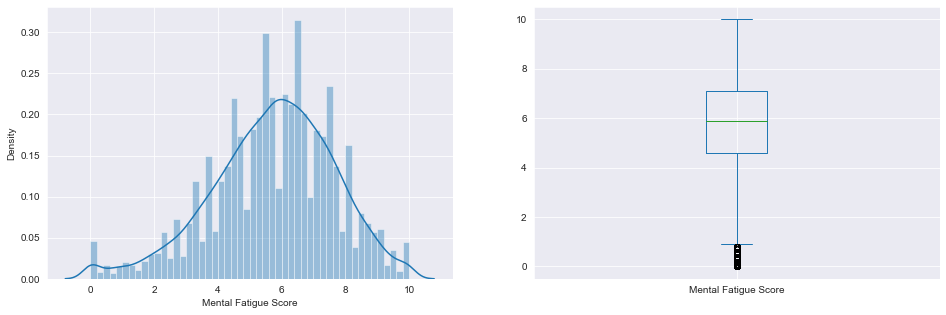

In [10]:
# Visualize numerical feature (Mental Fatigue Score)
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['Mental Fatigue Score']);
plt.subplot(122)
train_df['Mental Fatigue Score'].plot.box(figsize = (16, 5));
plt.show()

It can be seen that the distribution of the Mental Fatigue Score is fairly normal and there are some outliers

##### Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='Burn Rate'>

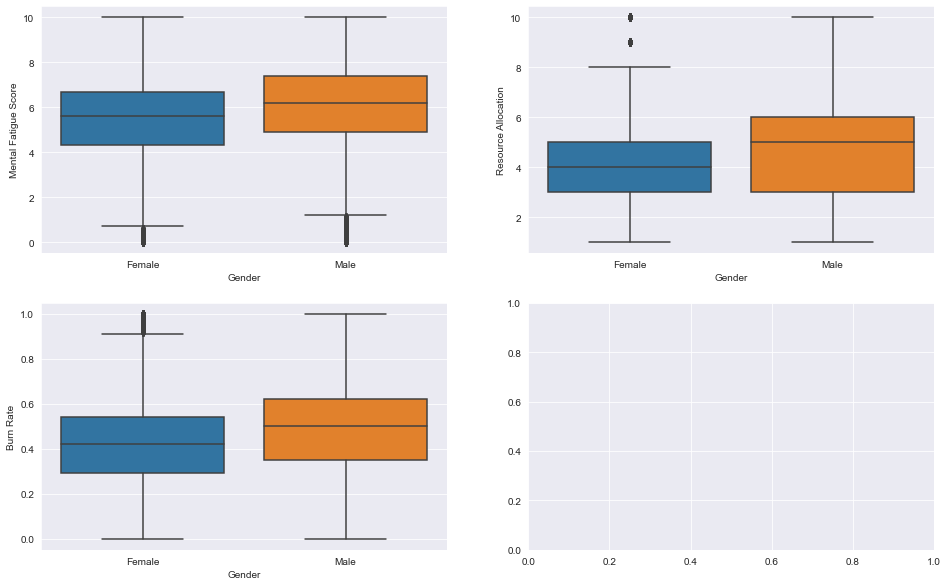

In [11]:
# Gender feature 
fig, axes = plt.subplots(2, 2, figsize = (16, 10))

# Mental Fatigue Score vs Gender
sns.boxplot(data = train_df, x = "Gender", y = "Mental Fatigue Score", ax = axes[0, 0])
# Resource Allocation vs Gender
sns.boxplot(data = train_df, x = "Gender", y = "Resource Allocation", ax = axes[0, 1])
# Burn Rate vs Gender
sns.boxplot(data = train_df, x = "Gender", y = "Burn Rate", ax = axes[1, 0])

It looks like more resources are allocated to Males, and the Mental Fatigue Score and Burn Rate of Males are higher than that of Females

<AxesSubplot:xlabel='Company Type', ylabel='Burn Rate'>

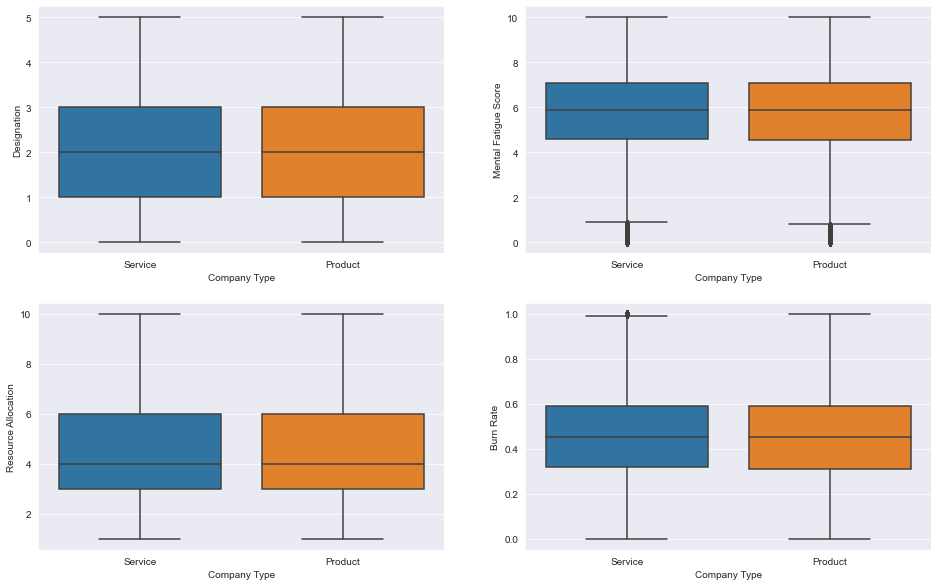

In [12]:
# Company Type feature
fig, axes = plt.subplots(2, 2, figsize = (16, 10))

# Designation vs Company Type
sns.boxplot(data = train_df, x = "Company Type", y = "Designation", ax = axes[0, 0])
# Mental Fatigue Score vs Company Type
sns.boxplot(data = train_df, x = "Company Type", y = "Mental Fatigue Score", ax = axes[0, 1])
# Resource Allocation vs Company Type
sns.boxplot(data = train_df, x = "Company Type", y = "Resource Allocation", ax = axes[1, 0])
# Burn Rate vs Company Type
sns.boxplot(data = train_df, x = "Company Type", y = "Burn Rate", ax = axes[1, 1])

It looks like the Company Type does not have any effect on the Resource Allocation, Designation, Mental Fatigue Score and Burn Rate

<AxesSubplot:xlabel='WFH Setup Available', ylabel='Burn Rate'>

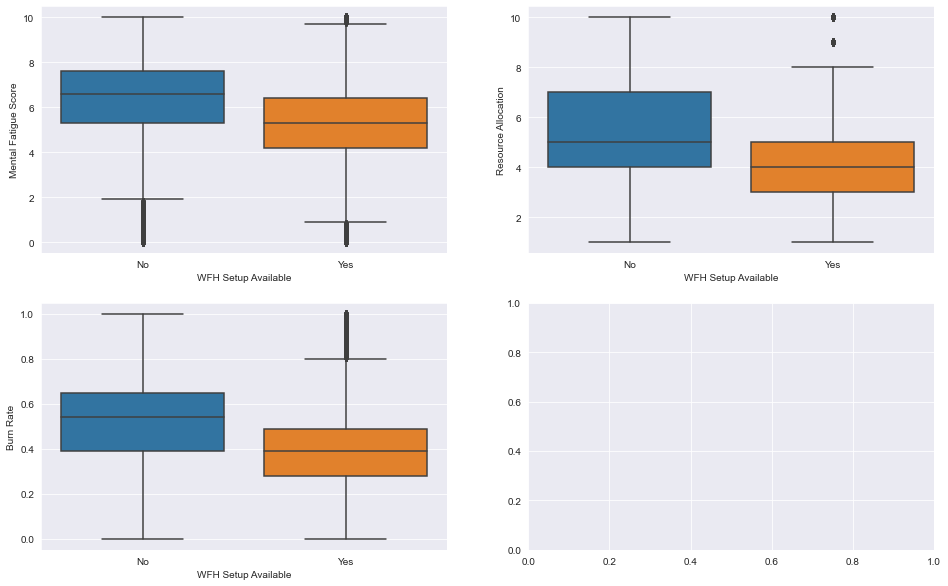

In [13]:
# WFH Setup Available feature
fig, axes = plt.subplots(2, 2, figsize = (16, 10))

# Mental Fatigue Score vs WFH Setup Available
sns.boxplot(data = train_df, x = "WFH Setup Available", y = "Mental Fatigue Score", ax = axes[0, 0])
# Resource Allocation vs WFH Setup Available
sns.boxplot(data = train_df, x = "WFH Setup Available", y = "Resource Allocation", ax = axes[0, 1])
# Burn Rate vs WFH Setup Available
sns.boxplot(data = train_df, x = "WFH Setup Available", y = "Burn Rate", ax = axes[1, 0])

It looks like those that have the Work From Home setup available to them have less Resources Allocated to them, less Mental Fatigue Score, and less Burn Rate

<AxesSubplot:xlabel='Designation', ylabel='Burn Rate'>

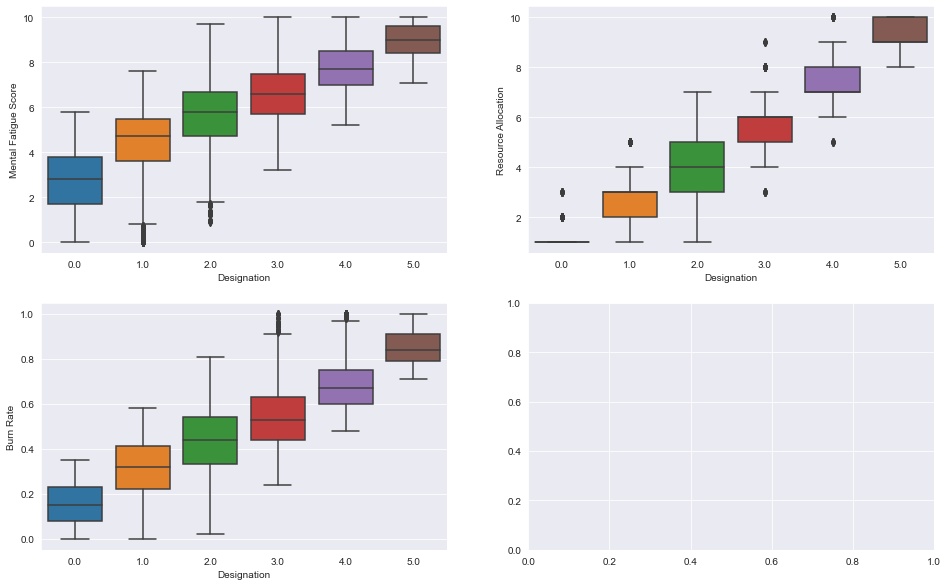

In [14]:
# Designation feature
fig, axes = plt.subplots(2, 2, figsize = (16, 10))

# Mental Fatigue Score vs Designation
sns.boxplot(data = train_df, x = "Designation", y = "Mental Fatigue Score", ax = axes[0, 0])
# Resource Allocation vs Designation
sns.boxplot(data = train_df, x = "Designation", y = "Resource Allocation", ax = axes[0, 1])
# Burn Rate vs Designation
sns.boxplot(data = train_df, x = "Designation", y = "Burn Rate", ax = axes[1, 0])

It seems like the designation of the employee increases with Mental Fatigue Score, Resource Allocation and Burn Rate

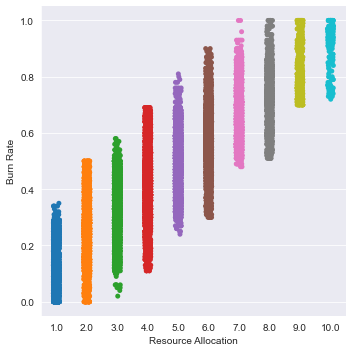

In [15]:
# Burn Rate vs Resource Allocation
sns.catplot(x = 'Resource Allocation', y = 'Burn Rate', data = train_df)

It can be seen from the plot above that the Burn Rate increases as the number of Resources Allocated to an employee increases

Text(0, 0.5, 'Burn Rate')

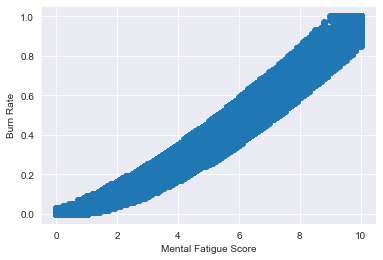

In [16]:
# Burn Rate vs Mental Fatigue Score
plt.scatter(x = train_df['Mental Fatigue Score'], y = train_df['Burn Rate'])
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Burn Rate')

It can be seen from the plot above that the Burn Rate increases as the Mental Fatigue Score of an employee increases

#### Cleaning and Preprocessing

In [17]:
# view sum of null values of each feature in the train dataset
train_df.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [18]:
# drop rows with missing target
missing_target_rows = train_df.loc[train_df["Burn Rate"].isna(), :].index
train_df = train_df.drop(missing_target_rows, axis = 0).reset_index(drop = True)

In [19]:
# print information about train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21626 entries, 0 to 21625
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           21626 non-null  object 
 1   Date of Joining       21626 non-null  object 
 2   Gender                21626 non-null  object 
 3   Company Type          21626 non-null  object 
 4   WFH Setup Available   21626 non-null  object 
 5   Designation           21626 non-null  float64
 6   Resource Allocation   20348 non-null  float64
 7   Mental Fatigue Score  19681 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.5+ MB


In [20]:
# print information about test_df
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           12250 non-null  object 
 1   Date of Joining       12250 non-null  object 
 2   Gender                12250 non-null  object 
 3   Company Type          12250 non-null  object 
 4   WFH Setup Available   12250 non-null  object 
 5   Designation           12250 non-null  float64
 6   Resource Allocation   12250 non-null  float64
 7   Mental Fatigue Score  12250 non-null  float64
dtypes: float64(3), object(5)
memory usage: 765.8+ KB


In [21]:
# Combine train and test data to make cleaning and preprocessing easier
target = train_df["Burn Rate"]
test_id = test_df["Employee ID"]

train_df_1 = train_df.drop(["Employee ID", "Burn Rate"], axis = 1)
test_df_1 = test_df.drop("Employee ID", axis = 1)

data = pd.concat([train_df_1, test_df_1], axis = 0).reset_index(drop = True)
data

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,2008-09-30,Female,Service,No,2.0,3.0,3.8
1,2008-11-30,Male,Service,Yes,1.0,2.0,5.0
2,2008-03-10,Female,Product,Yes,2.0,NaN,5.8
3,2008-11-03,Male,Service,Yes,1.0,1.0,2.6
4,2008-07-24,Female,Service,No,3.0,7.0,6.9
...,...,...,...,...,...,...,...
33871,2008-10-02,Female,Service,Yes,1.0,2.0,6.1
33872,2008-03-31,Female,Product,Yes,2.0,4.0,5.9
33873,2008-02-12,Male,Service,No,4.0,7.0,9.6
33874,2008-02-06,Male,Service,No,3.0,6.0,6.7


In [22]:
# print information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33876 entries, 0 to 33875
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       33876 non-null  object 
 1   Gender                33876 non-null  object 
 2   Company Type          33876 non-null  object 
 3   WFH Setup Available   33876 non-null  object 
 4   Designation           33876 non-null  float64
 5   Resource Allocation   32598 non-null  float64
 6   Mental Fatigue Score  31931 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.8+ MB


In [23]:
## Ensure proper data types
data_1 = data.copy()

# Change datatype of Date of Joining to datetime
data_1["Date of Joining"] = pd.to_datetime(data_1["Date of Joining"])
# Change datatype of Designation to object
data_1["Designation"] = data_1["Designation"].astype(str)

In [24]:
# print information about data_1
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33876 entries, 0 to 33875
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date of Joining       33876 non-null  datetime64[ns]
 1   Gender                33876 non-null  object        
 2   Company Type          33876 non-null  object        
 3   WFH Setup Available   33876 non-null  object        
 4   Designation           33876 non-null  object        
 5   Resource Allocation   32598 non-null  float64       
 6   Mental Fatigue Score  31931 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 1.8+ MB


In [25]:
## Fill missing values for numeric columns
data_2 = data_1.copy()

# get numeric columns with missing values and store in lst_missing_numeric_col
lst_missing_numeric_col = list(data_2.columns[data_2.isna().sum() > 0])
lst_missing_numeric_col

['Resource Allocation', 'Mental Fatigue Score']

In [26]:
# print description of the data in Resource Allocation and Mental Fatigue Score
data_2[lst_missing_numeric_col].describe()

,Resource Allocation,Mental Fatigue Score
count,32598.000000,31931.000000
mean,4.474446,5.726291
std,2.047210,1.918184
min,1.000000,0.000000
25%,3.000000,4.500000
50%,4.000000,5.900000
75%,6.000000,7.100000
max,10.000000,10.000000


In [27]:
# Fill Mental Fatigue Score with mean
for col in lst_missing_numeric_col:
    data_2["Mental Fatigue Score"].fillna(data_2["Mental Fatigue Score"].mean(), inplace = True)
    
# Fill Resource Allocation with median
for col in lst_missing_numeric_col:
    data_2["Resource Allocation"].fillna(data_2["Resource Allocation"].median(), inplace = True)

In [28]:
data_2.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [29]:
# drop irrelevant columns
data_3 = data_2.copy()

# drop Date of Joining column
data_3 = data_3.drop("Date of Joining", axis = 1)

# drop company type column
data_3 = data_3.drop("Company Type", axis = 1)

In [30]:
# view first 3 rows of data_3
data_3.head(3)

,Gender,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,Female,No,2.0,3.0,3.8
1,Male,Yes,1.0,2.0,5.0
2,Female,Yes,2.0,4.0,5.8


In [31]:
# Encode categorical features
data_4 = data_3.copy()
data_4 = pd.get_dummies(data_4)
data_4.head()

,Resource Allocation,Mental Fatigue Score,Gender_Female,Gender_Male,WFH Setup Available_No,WFH Setup Available_Yes,Designation_0.0,Designation_1.0,Designation_2.0,Designation_3.0,Designation_4.0,Designation_5.0
0,3.0,3.8,1,0,1,0,0,0,1,0,0,0
1,2.0,5.0,0,1,0,1,0,1,0,0,0,0
2,4.0,5.8,1,0,0,1,0,0,1,0,0,0
3,1.0,2.6,0,1,0,1,0,1,0,0,0,0
4,7.0,6.9,1,0,1,0,0,0,0,1,0,0


#### Scaling

In [34]:
# scale data
data_5 = data_4.copy()
scaler = StandardScaler()
scaler.fit(data_5)
data_6 = scaler.transform(data_5)

data_6 = pd.DataFrame(data_6, index = data_5.index, columns = data_5.columns)
data_6.head(2)

,Resource Allocation,Mental Fatigue Score,Gender_Female,Gender_Male,WFH Setup Available_No,WFH Setup Available_Yes,Designation_0.0,Designation_1.0,Designation_2.0,Designation_3.0,Designation_4.0,Designation_5.0
0,-0.724569,-1.034376,0.950678,-0.950678,1.085403,-1.085403,-0.268691,-0.520349,1.415436,-0.60031,-0.342304,-0.130937
1,-1.222026,-0.390002,-1.051881,1.051881,-0.921316,0.921316,-0.268691,1.921787,-0.706496,-0.60031,-0.342304,-0.130937


In [36]:
# split the data back to get the train and test data
data_7 = data_6.copy()
train_data_final = data_7.loc[:train_df.index.max(),  :].copy()
test_data_final = data_7.loc[train_df.index.max() + 1:, :].reset_index(drop = True).copy()


<AxesSubplot:>

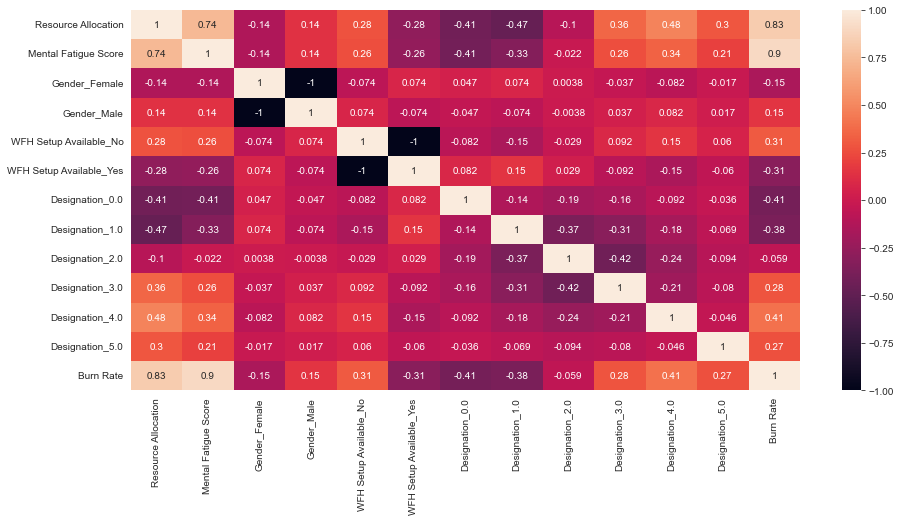

In [37]:
# Plot heatmap to view how correlated the features are with the target feature
train_data_final_1 = train_data_final.copy()
train_data_final_1["Burn Rate"] = target

fig = plt.subplots(figsize = (15, 7))
corr = train_data_final_1.corr()
sns.heatmap(corr, annot = True)

### Model Training

In [38]:
## Prepare data for feeding into the models
X = train_data_final.copy()
y = target

In [39]:
# view first 5 rows of X
X.head()

,Resource Allocation,Mental Fatigue Score,Gender_Female,Gender_Male,WFH Setup Available_No,WFH Setup Available_Yes,Designation_0.0,Designation_1.0,Designation_2.0,Designation_3.0,Designation_4.0,Designation_5.0
0,-0.724569,-1.034376,0.950678,-0.950678,1.085403,-1.085403,-0.268691,-0.520349,1.415436,-0.600310,-0.342304,-0.130937
1,-1.222026,-0.390002,-1.051881,1.051881,-0.921316,0.921316,-0.268691,1.921787,-0.706496,-0.600310,-0.342304,-0.130937
2,-0.227113,0.039580,0.950678,-0.950678,-0.921316,0.921316,-0.268691,-0.520349,1.415436,-0.600310,-0.342304,-0.130937
3,-1.719483,-1.678749,-1.051881,1.051881,-0.921316,0.921316,-0.268691,1.921787,-0.706496,-0.600310,-0.342304,-0.130937
4,1.265258,0.630256,0.950678,-0.950678,1.085403,-1.085403,-0.268691,-0.520349,-0.706496,1.665805,-0.342304,-0.130937


In [40]:
# view first 5 rows of y
y.head()

0    0.16
1    0.36
2    0.49
3    0.20
4    0.52
Name: Burn Rate, dtype: float64

In [41]:
# Split X and y into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Linear Regression (L2 Regularization)": Ridge(),
    "Linear Regression (L1 Regularization)": Lasso(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "CatBoost": CatBoostRegressor(verbose = 0)
    
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained")

Linear Regression trained
Linear Regression (L2 Regularization) trained
Linear Regression (L1 Regularization) trained
K-Nearest Neighbors trained
Decision Tree trained
Random Forest trained
Gradient Boosting trained
CatBoost trained


In [43]:
# print R squared score of models
for name, model in models.items():
    print(name + " R*2 Score: {:.5f}".format(model.score(X_val, y_val)))

Linear Regression R*2 Score: 0.86933
Linear Regression (L2 Regularization) R*2 Score: 0.86933
Linear Regression (L1 Regularization) R*2 Score: -0.00000
K-Nearest Neighbors R*2 Score: 0.89038
Decision Tree R*2 Score: 0.89335
Random Forest R*2 Score: 0.89780
Gradient Boosting R*2 Score: 0.90037
CatBoost R*2 Score: 0.90896


In [44]:
# (Ensembling) Average prediction of the 2 best models up in parallel 
predictions = (
    0.6 * models["CatBoost"].predict(test_data_final) +
    0.4 * models["Gradient Boosting"].predict(test_data_final)     
)

In [45]:
# generate predictions and store in predictions
predictions = np.round(predictions, 2)
predictions

array([0.62, 0.35, 0.42, ..., 0.82, 0.58, 0.12])

In [46]:
# view sample submission
sample_submission = pd.read_csv("sample_submission_burn_out_rate.csv")
sample_submission

,Employee ID,Burn Rate
0,fffe32003000360033003200,0.16
1,fffe3700360033003500,0.36
2,fffe31003300320037003900,0.49
3,fffe32003400380032003900,0.20
4,fffe31003900340031003600,0.52


In [47]:
# Use predictions to generate submission file as csv
submission = pd.concat([test_id, pd.Series(predictions, name = "Burn Rate")], axis = 1)
submission.head()

,Employee ID,Burn Rate
0,fffe31003300390039003000,0.62
1,fffe31003300310037003800,0.35
2,fffe33003400380035003900,0.42
3,fffe3100370039003200,0.38
4,fffe32003600390036003700,0.53
